In [10]:
import sys
sys.path.append(r'/Users/kostastsampourakis/Desktop/code/Python/projects/gaussfiltax')

import time

from jax import numpy as jnp
from jax import random as jr
from tensorflow_probability.substrates.jax.distributions import MultivariateNormalFullCovariance as MVN
# import tensorflow as tf
# tf.test.gpu_device_name()

import gaussfiltax.utils as utils
import gaussfiltax.inference as gf
from gaussfiltax.models import ParamsNLSSM, NonlinearSSM, ParamsBPF

import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

## Models and simulations

In [11]:
# Parameters
state_dim = 4
state_noise_dim = 2
emission_dim = 1
emission_noise_dim = 1
seq_length = 30
mu0 = 1.0 * jnp.array([-0.05, 0.001, 0.7, -0.05])
# mu0 = jnp.ones(state_dim)
q0 = jnp.zeros(state_noise_dim)
r0 = jnp.zeros(emission_noise_dim)
Sigma0 = 1.0 * jnp.array([[0.1, 0.0, 0.0, 0.0],[0.0, 0.005, 0.0, 0.0],[0.0, 0.0, 0.1, 0.0],[0.0, 0.0, 0.0, 0.01]])
Q = 1e-6 * jnp.eye(state_noise_dim)
R = 25*1e-6 * jnp.eye(emission_noise_dim)

dt = 0.5
FCV = jnp.array([[1, dt, 0, 0],[0, 1, 0, 0],[0, 0, 1, dt],[0, 0, 0, 1]])
acc = 0.5
Omega = lambda x, acc: 0.1 * acc / jnp.sqrt(x[1]**2 + x[3]**2)
FCT =  lambda x, a: jnp.array([[1, jnp.sin(dt * Omega(x, a)) / Omega(x, a), 0, -(1-jnp.cos(dt * Omega(x, a))) / Omega(x, a)],
                            [0, jnp.cos(dt * Omega(x, a)), 0, -jnp.sin(dt * Omega(x, a))],
                            [0, (1-jnp.cos(dt * Omega(x, a))) / Omega(x, a), 1, jnp.sin(dt * Omega(x, a)) / Omega(x, a)],
                            [0, jnp.sin(dt * Omega(x, a)), 0, jnp.cos(dt * Omega(x, a))]])

G = jnp.array([[0.5, 0],[1, 0],[0, 0.5],[0, 1]])
fBOT = lambda x, q, u: FCV @ x + G @ q
fManBOT = lambda x, q, u: (0.5*(u-1)*(u-2)*FCV - u*(u-2)*FCT(x, acc) + 0.5*u*(u-1) * FCT(x, -acc)) @ x + G @ q
gBOT = lambda x, r, u: jnp.arctan2(x[2], x[0]) + r
gBOTlp = lambda x, y, u: MVN(loc = gBOT(x, 0.0, u), covariance_matrix = R).log_prob(y)
# inputs = jnp.zeros((seq_length, 1))
inputs = jnp.array([1]*int(seq_length/3) + [0]*int(seq_length/3) + [2]*int(seq_length/3)) # maneuver inputs

In [12]:
f = fManBOT
g = gBOT
glp = gBOTlp

In [13]:
# initialization
model = NonlinearSSM(state_dim, state_noise_dim, emission_dim, emission_noise_dim)
params = ParamsNLSSM(
    initial_mean=mu0,
    initial_covariance=Sigma0,
    dynamics_function=f,
    dynamics_noise_bias= q0,
    dynamics_noise_covariance=Q,
    emission_function=g,
    emission_noise_bias= r0,
    emission_noise_covariance=R,
)

## Experiments

sim 1/20
key0:  [3568232559  713140391]
key:  [3620866055 2761185182]
       Time taken for GSF:  0.7145941257476807
       Time taken for AGSF:  17.997756004333496
       Time taken for BPF:  0.5036880970001221
              GSF RMSE: nan
              AGSF RMSE: 0.1724201
              BPF RMSE: 2.2990792


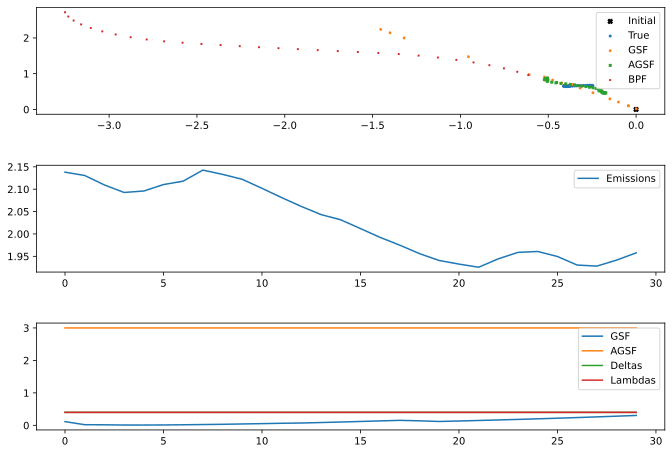

sim 2/20
key0:  [1465327881 3584627995]
key:  [1697684642 2171187924]
       Time taken for GSF:  0.6717829704284668
       Time taken for AGSF:  17.085041046142578
       Time taken for BPF:  0.49994397163391113
              GSF RMSE: 0.95932883
              AGSF RMSE: 0.5088761
              BPF RMSE: 0.2195716


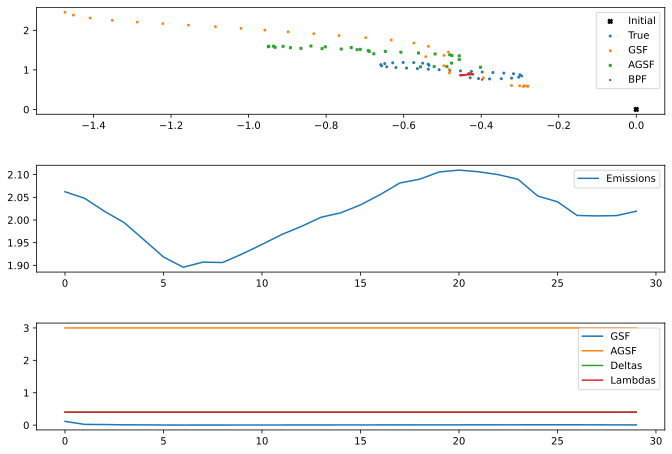

sim 3/20
key0:  [2140591709 3509555027]
key:  [704465164 725215309]
       Time taken for GSF:  1.2618439197540283
       Time taken for AGSF:  16.999696969985962
       Time taken for BPF:  0.4975137710571289
              GSF RMSE: 0.41835392
              AGSF RMSE: 1.0023749
              BPF RMSE: 0.26186764


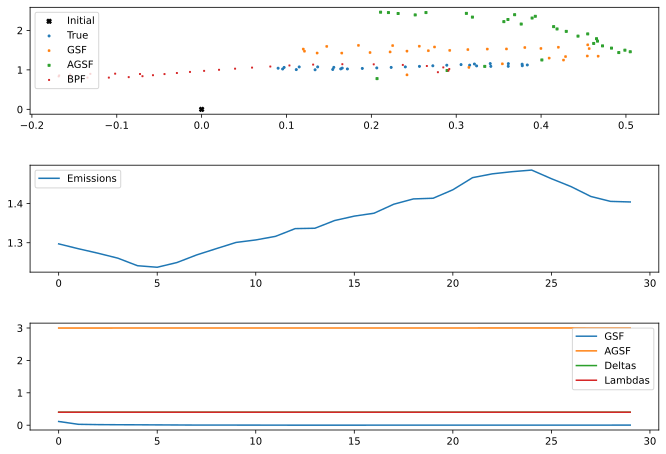

sim 4/20
key0:  [1303716432 1855432450]
key:  [2242020428 1473874242]
       Time taken for GSF:  0.6781330108642578
       Time taken for AGSF:  17.315199851989746
       Time taken for BPF:  0.516162633895874
              GSF RMSE: 0.13799381
              AGSF RMSE: 0.31271315
              BPF RMSE: 0.53443956


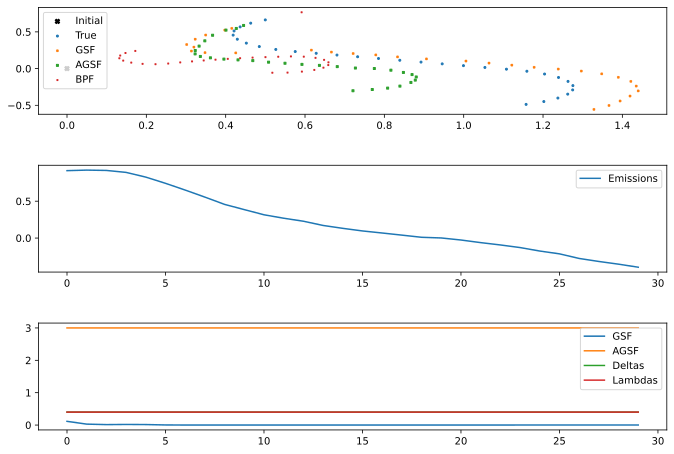

sim 5/20
key0:  [3538396939 1919323064]
key:  [ 339212260 4043306578]
       Time taken for GSF:  0.694774866104126
       Time taken for AGSF:  17.382261991500854
       Time taken for BPF:  0.5007181167602539
              GSF RMSE: 0.3279935
              AGSF RMSE: 0.65295416
              BPF RMSE: 0.672521


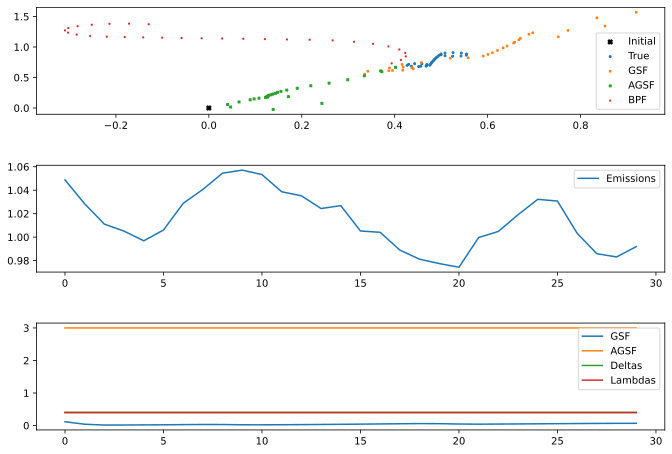

sim 6/20
key0:  [1897248577 2211687077]
key:  [2260205803 3719488220]
       Time taken for GSF:  0.6705880165100098
       Time taken for AGSF:  17.138441801071167
       Time taken for BPF:  0.5069060325622559
              GSF RMSE: 0.123831995
              AGSF RMSE: 0.18182951
              BPF RMSE: 0.8107576


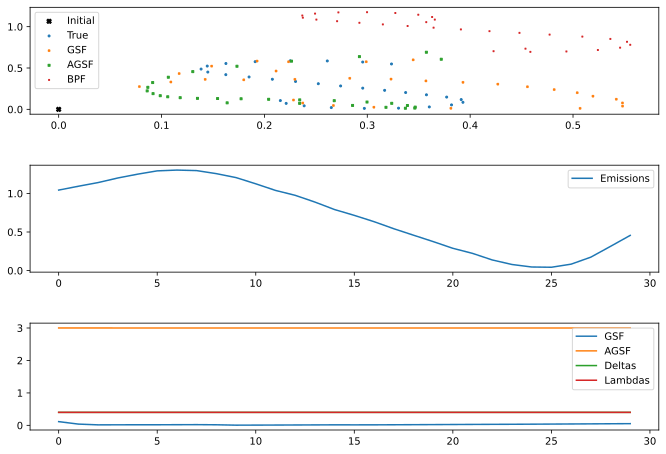

sim 7/20
key0:  [3004561477  573555509]
key:  [1598224098 3185611331]
       Time taken for GSF:  0.6979272365570068
       Time taken for AGSF:  16.565351963043213
       Time taken for BPF:  0.5125119686126709
              GSF RMSE: 0.19334835
              AGSF RMSE: 0.5332069
              BPF RMSE: 0.51607686


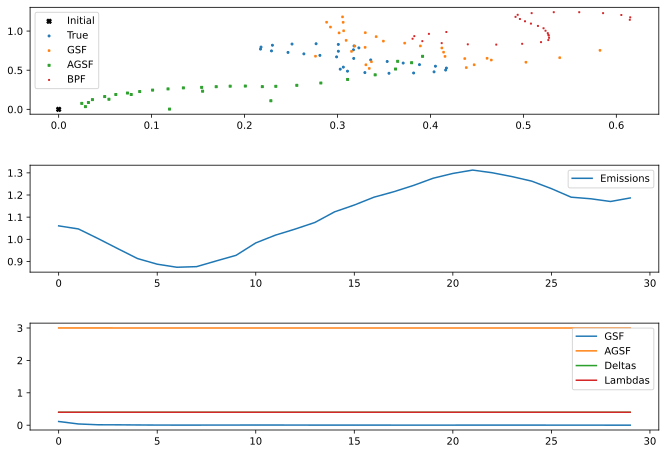

sim 8/20
key0:  [1641975508 2801076567]
key:  [ 858213663 2181881252]
       Time taken for GSF:  0.6769809722900391
       Time taken for AGSF:  17.41518497467041
       Time taken for BPF:  0.5718042850494385
              GSF RMSE: 0.34557152
              AGSF RMSE: 0.6797397
              BPF RMSE: 2.1634073


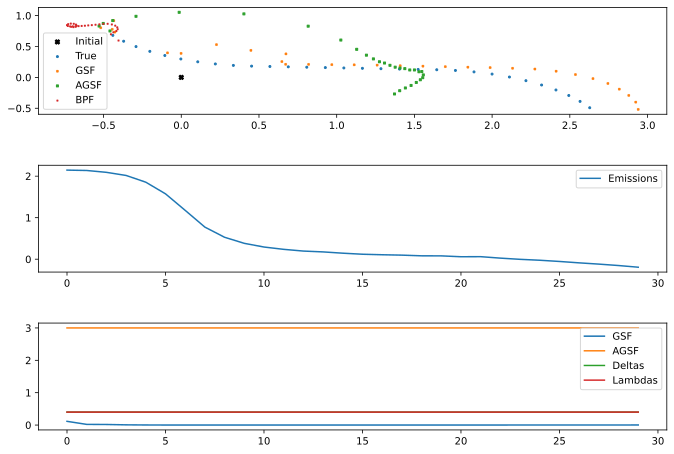

sim 9/20
key0:  [2964592761 3963767653]
key:  [1703955756 4117464756]
       Time taken for GSF:  0.7285628318786621
       Time taken for AGSF:  17.90672516822815
       Time taken for BPF:  0.522475004196167
              GSF RMSE: 0.109889194
              AGSF RMSE: 11.257935
              BPF RMSE: 1.5400182


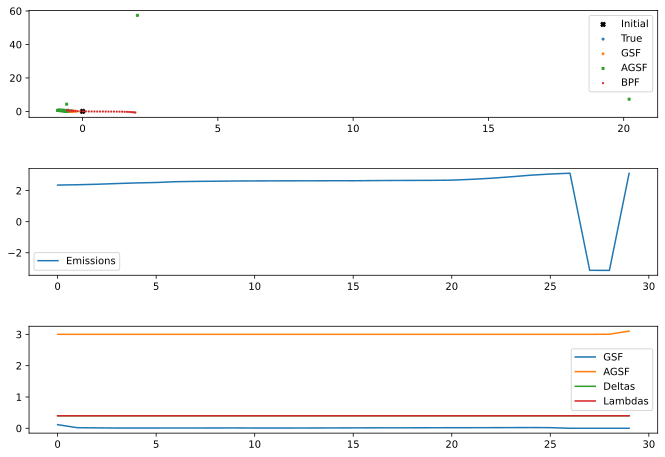

sim 10/20
key0:  [ 750034854 1626364709]
key:  [2376732689 1821473027]
       Time taken for GSF:  0.7120342254638672
       Time taken for AGSF:  16.637518882751465
       Time taken for BPF:  0.500978946685791
              GSF RMSE: nan
              AGSF RMSE: 0.7691619
              BPF RMSE: 0.6096285


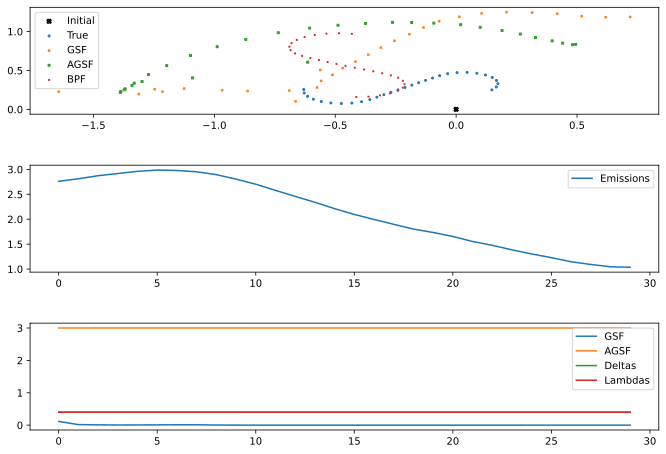

sim 11/20
key0:  [2473269265 1930548377]
key:  [1355056684 1763165466]
       Time taken for GSF:  1.4233489036560059
       Time taken for AGSF:  16.83573818206787
       Time taken for BPF:  0.5345621109008789
              GSF RMSE: 0.39555612
              AGSF RMSE: 0.39296287
              BPF RMSE: 1.3194202


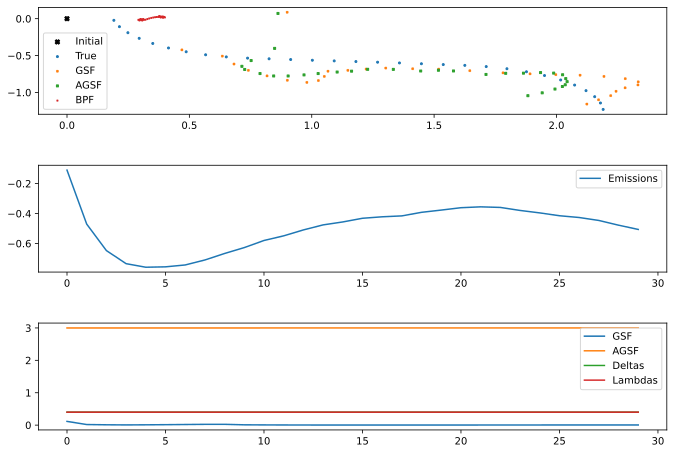

sim 12/20
key0:  [2242128751 2689217281]
key:  [3601313016  705004009]
       Time taken for GSF:  0.6977322101593018
       Time taken for AGSF:  18.872946977615356
       Time taken for BPF:  0.6103212833404541
              GSF RMSE: 0.33383444
              AGSF RMSE: 1.0092175
              BPF RMSE: 1.2981442


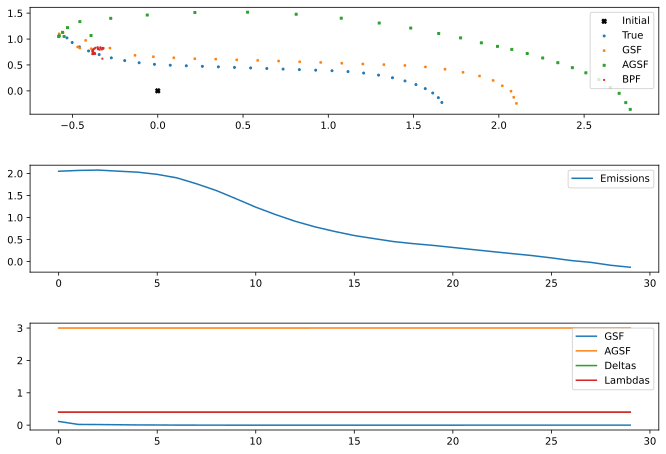

sim 13/20
key0:  [581586835 330633787]
key:  [3784394595 4044246026]
       Time taken for GSF:  0.7656331062316895
       Time taken for AGSF:  16.813071966171265
       Time taken for BPF:  0.5002799034118652
              GSF RMSE: 0.43918613
              AGSF RMSE: 0.3249098
              BPF RMSE: 1.1924785


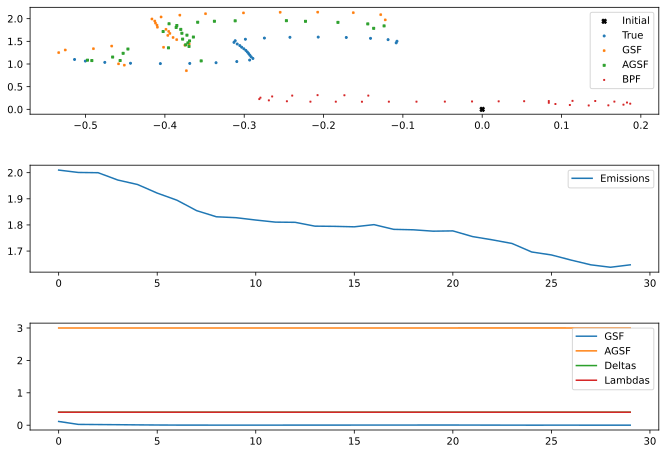

sim 14/20
key0:  [488089718 318464779]
key:  [ 979764689 1026999993]
       Time taken for GSF:  0.696223258972168
       Time taken for AGSF:  17.76110601425171
       Time taken for BPF:  0.5182068347930908
              GSF RMSE: 0.18978031
              AGSF RMSE: 0.8843515
              BPF RMSE: 0.6102822


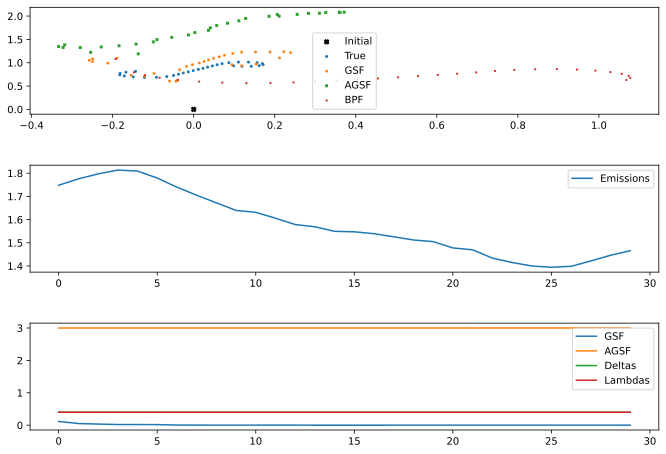

sim 15/20
key0:  [1491761296  588544249]
key:  [1968947799 1282838610]
       Time taken for GSF:  0.7091851234436035
       Time taken for AGSF:  16.459362268447876
       Time taken for BPF:  0.5046646595001221
              GSF RMSE: 0.17497423
              AGSF RMSE: 107.29812
              BPF RMSE: 1.8548298


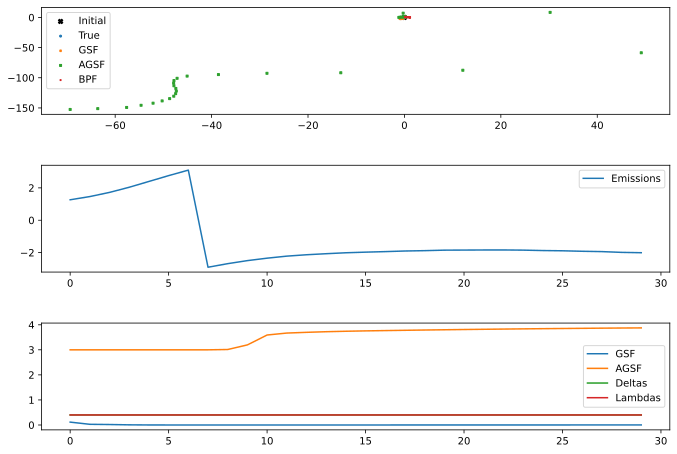

sim 16/20
key0:  [2142401925  580756533]
key:  [2808712755 3382142284]
       Time taken for GSF:  1.4873809814453125
       Time taken for AGSF:  16.855409860610962
       Time taken for BPF:  0.5308120250701904
              GSF RMSE: 0.30231118
              AGSF RMSE: 0.79284394
              BPF RMSE: 0.81754977


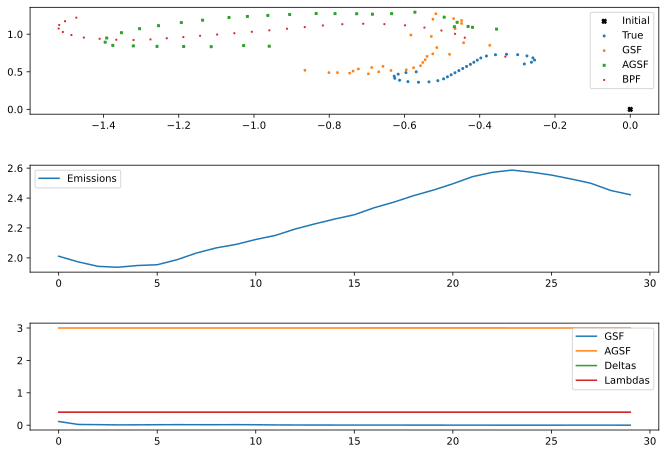

sim 17/20
key0:  [1214963262 2397950654]
key:  [2026553328  514088349]
       Time taken for GSF:  0.6857419013977051
       Time taken for AGSF:  18.63114309310913
       Time taken for BPF:  0.6554827690124512
              GSF RMSE: 0.12811753
              AGSF RMSE: 0.8232733
              BPF RMSE: 0.2804233


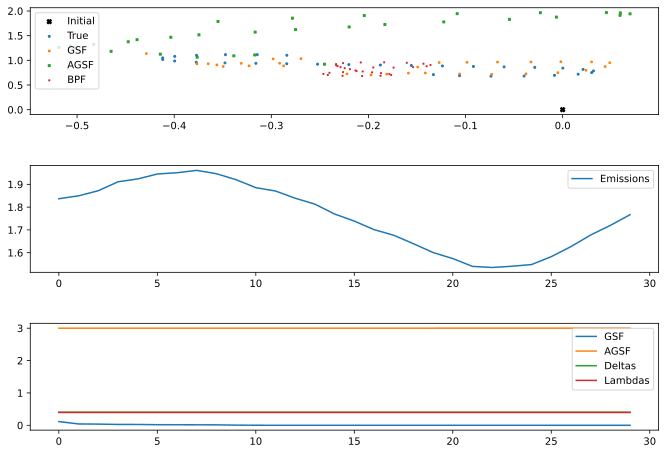

sim 18/20
key0:  [ 218736863 3855308191]
key:  [4161984306 3196801348]
       Time taken for GSF:  0.7173388004302979
       Time taken for AGSF:  16.433902978897095
       Time taken for BPF:  0.5307340621948242
              GSF RMSE: 0.7603644
              AGSF RMSE: 0.477211
              BPF RMSE: 0.3532144


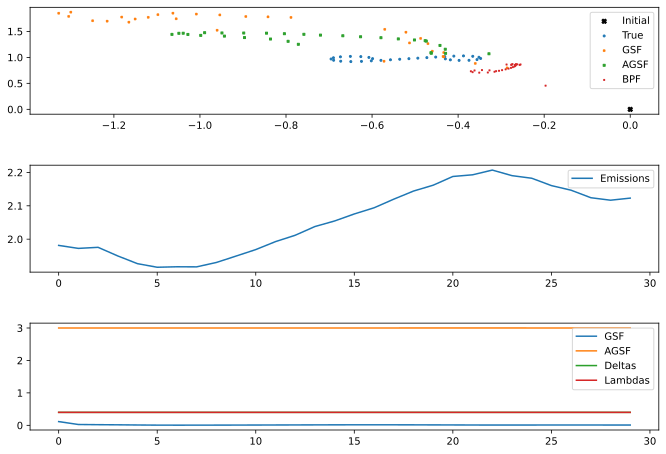

sim 19/20
key0:  [1151028487 2939992156]
key:  [1376876312 2772186225]
       Time taken for GSF:  0.6977689266204834
       Time taken for AGSF:  18.108060836791992
       Time taken for BPF:  0.5362899303436279
              GSF RMSE: 0.61264634
              AGSF RMSE: 0.9224173
              BPF RMSE: 1.8654509


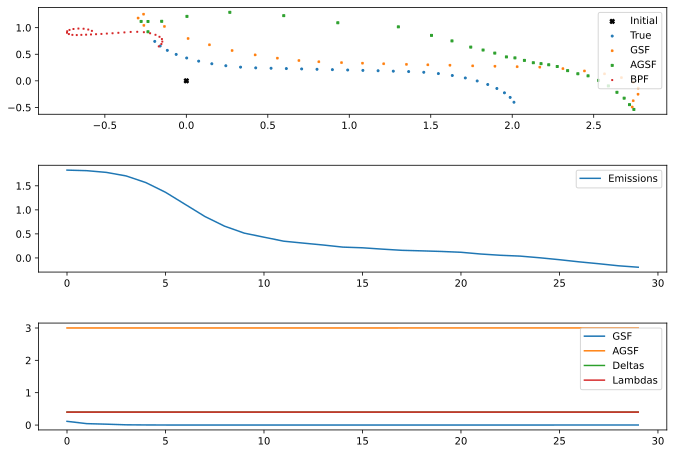

sim 20/20
key0:  [1209653932 4060347193]
key:  [2941757454  870593673]
       Time taken for GSF:  0.7166321277618408
       Time taken for AGSF:  16.88694190979004
       Time taken for BPF:  0.5132269859313965
              GSF RMSE: 2.153985
              AGSF RMSE: 1.197564
              BPF RMSE: 0.40920064


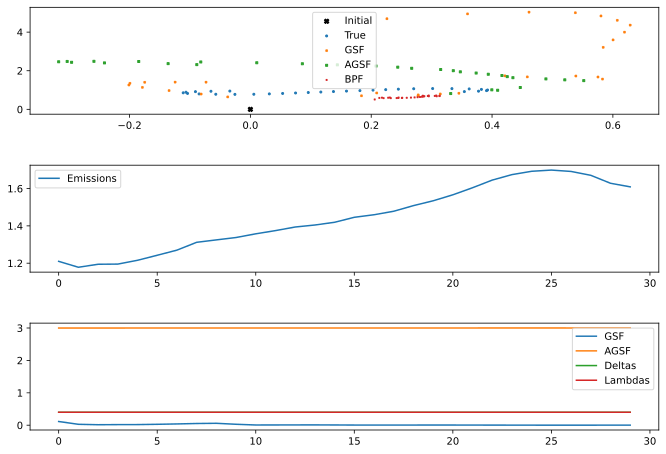

In [14]:
verbose = False
Nsim = 20
gsf_rmse = jnp.zeros(Nsim)
agsf_rmse = jnp.zeros(Nsim)
agsf_opt_rmse = jnp.zeros(Nsim)
bpf_rmse = jnp.zeros(Nsim)
gsf_norm = jnp.zeros((Nsim, seq_length))
agsf_norm = jnp.zeros((Nsim, seq_length))
agsf_opt_norm = jnp.zeros((Nsim, seq_length))
bpf_norm = jnp.zeros((Nsim, seq_length))
gsf_time = jnp.zeros(Nsim)
agsf_time = jnp.zeros(Nsim)
agsf_opt_time = jnp.zeros(Nsim)
bpf_time = jnp.zeros(Nsim)
next_key = jr.PRNGKey(1)
for i in range(Nsim):
    print('sim {}/{}'.format(i+1, Nsim))
    # Generate Data
    key0, key, next_key = jr.split(next_key, 3)
    print('key0: ', key0)
    print('key: ', key)
    states, emissions = model.sample(params, key0, seq_length, inputs = inputs)

    # GSF
    M = 5
    tin = time.time()
    posterior_filtered_gsf = gf.gaussian_sum_filter(params, emissions, M, 1, inputs)
    point_estimate_gsf = jnp.sum(jnp.einsum('ijk,ij->ijk', posterior_filtered_gsf.means, posterior_filtered_gsf.weights), axis=0)
    tout = time.time()
    t_gsf= tout - tin
    print('       Time taken for GSF: ', tout - tin)

    # AGSF
    opt_args = (0.1, 0.1)
    num_components = [M, 5, 5] # has to be set correctly OW "TypeError: Cannot interpret '<function <lambda> at 0x12eae3ee0>' as a data type". Check internal containers._branch_from_node


    tin = time.time()
    posterior_filtered_agsf, aux_outputs = gf.augmented_gaussian_sum_filter(params, emissions, num_components, rng_key = key, opt_args = opt_args, inputs=inputs)    
    point_estimate_agsf = jnp.sum(jnp.einsum('ijk,ij->ijk', posterior_filtered_agsf.means, posterior_filtered_agsf.weights), axis=0)
    tout = time.time()
    t_agsf= tout - tin
    print('       Time taken for AGSF: ', tout - tin)

    # AGSF Optimal
    # tin = time.time()
    # posterior_filtered_agsf_opt, aux_outputs_opt = gf.augmented_gaussian_sum_filter_optimal(params, emissions, num_components, rng_key = key, opt_args = opt_args, inputs=inputs)    
    # point_estimate_agsf_opt = jnp.sum(jnp.einsum('ijk,ij->ijk', posterior_filtered_agsf_opt.means, posterior_filtered_agsf_opt.weights), axis=0)
    # tout = time.time()
    # t_agsf_opt= tout - tin
    # print('       Time taken for AGSF optimal: ', tout - tin)

    # BPF
    tin = time.time()
    num_particles = 100

    params_bpf = ParamsBPF(
        initial_mean=mu0,
        initial_covariance=Sigma0,
        dynamics_function=f,
        dynamics_noise_bias=q0,
        dynamics_noise_covariance=Q,
        emission_function=g,
        emission_noise_bias=r0,
        emission_noise_covariance=R,
        emission_distribution_log_prob = glp
    )

    posterior_bpf = gf.bootstrap_particle_filter(params_bpf, emissions, num_particles, key, inputs)
    point_estimate_bpf = jnp.sum(jnp.einsum('ijk,ij->ijk', posterior_bpf["particles"], posterior_bpf["weights"]), axis=0)
    tout = time.time()
    t_bpf = tout - tin
    print('       Time taken for BPF: ', tout - tin)

    # Computation of errors
    gsf_rmse = gsf_rmse.at[i].set(utils.rmse(point_estimate_gsf, states))
    agsf_rmse = agsf_rmse.at[i].set(utils.rmse(point_estimate_agsf, states))
    # agsf_opt_rmse = agsf_opt_rmse.at[i].set(utils.rmse(point_estimate_agsf_opt, states))
    bpf_rmse = bpf_rmse.at[i].set(utils.rmse(point_estimate_bpf, states))

    print('              GSF RMSE:', gsf_rmse[i])                                                                           
    print('              AGSF RMSE:', agsf_rmse[i])
    # print('              AGSF Optimal RMSE:', agsf_opt_rmse[i])
    print('              BPF RMSE:', bpf_rmse[i])

    gsf_norm = gsf_norm.at[i].set(jnp.linalg.norm(point_estimate_gsf - states, axis = 1))
    agsf_norm = agsf_norm.at[i].set(jnp.linalg.norm(point_estimate_agsf - states, axis = 1))
    # agsf_opt_norm = agsf_opt_norm.at[i].set(jnp.linalg.norm(point_estimate_agsf_opt - states, axis = 1))
    bpf_norm = bpf_norm.at[i].set(jnp.linalg.norm(point_estimate_bpf - states, axis = 1))

    gsf_time = gsf_time.at[i].set(t_gsf)
    agsf_time = agsf_time.at[i].set(t_agsf)
    # agsf_opt_time = agsf_opt_time.at[i].set(t_agsf_opt)
    bpf_time = bpf_time.at[i].set(t_bpf)

    fig, axes = plt.subplots(3, 1, sharex=False, figsize=(10, 7))
    fig.tight_layout(pad=3.0)
    axes[0].scatter(jnp.array([0]), jnp.array([0]), label = 'Initial', s = 20, marker = 'X', color = 'black')
    axes[0].scatter(states[:,0], states[:,2], label = 'True', s = 4)
    axes[0].scatter(point_estimate_gsf[:,0], point_estimate_gsf[:,2], label = 'GSF', s = 4, marker = 'x')
    axes[0].scatter(point_estimate_agsf[:,0], point_estimate_agsf[:,2], label = 'AGSF', s = 4, marker = 's')
    # axes[0].scatter(point_estimate_agsf_opt[:,0], point_estimate_agsf_opt[:,2], label = 'AGSF-O', s = 4, marker= 'd')
    axes[0].scatter(point_estimate_bpf[:,0], point_estimate_bpf[:,2], label = 'BPF', s = 4, marker = '+')
    axes[0].legend()   

    axes[1].plot(emissions, label = 'Emissions')
    axes[1].legend()

    axes[2].plot(jnp.sum(jnp.trace(posterior_filtered_gsf.covariances, axis1=2, axis2=3), axis=0)/M, label = 'GSF')
    axes[2].plot(jnp.sum(jnp.trace(posterior_filtered_agsf.covariances, axis1=2, axis2=3), axis=0)/M, label = 'AGSF')
    axes[2].plot(jnp.sum(jnp.trace(aux_outputs['Deltas'], axis1=2, axis2=3), axis=1)/5, label = 'Deltas')
    axes[2].plot(jnp.sum(jnp.trace(aux_outputs['Lambdas'], axis1=2, axis2=3), axis=1)/25, label = 'Lambdas')
    axes[2].legend()

 

    plt.show()

In [15]:
ind = jnp.argwhere(jnp.isnan(gsf_rmse)).flatten()
gsf_rmse = jnp.delete(gsf_rmse, ind, axis = 0)

In [16]:
import pandas as pd
gsf_armse = jnp.mean(gsf_rmse)
agsf_armse = jnp.mean(agsf_rmse)
bpf_armse = jnp.mean(bpf_rmse)

gsf_atime = jnp.mean(gsf_time)
agsf_atime = jnp.mean(agsf_time)
bpf_atime = jnp.mean(bpf_time)

gsf_tab_out = '{:10.2f}±{:10.2f}'.format(gsf_armse, jnp.std(gsf_rmse))
agsf_tab_out = '{:10.2f}±{:10.2f}'.format(agsf_armse, jnp.std(agsf_rmse))
# agsf_opt_tab_out = '{:10.2f}±{:10.2f}'.format(agsf_opt_armse, jnp.std(agsf_opt_rmse))
bpf_tab_out = '{:10.2f}±{:10.2f}'.format(bpf_armse, jnp.std(bpf_rmse))

gsf_tab_out1 = '{:10.2f}±{:10.2f}'.format(gsf_atime, jnp.std(gsf_time))
agsf_tab_out1 = '{:10.2f}±{:10.2f}'.format(agsf_atime, jnp.std(agsf_time))
# agsf_opt_tab_out1 = '{:10.2f}±{:10.2f}'.format(agsf_opt_atime, jnp.std(agsf_opt_time))
bpf_tab_out1 = '{:10.2f}±{:10.2f}'.format(bpf_atime, jnp.std(bpf_time))

df = pd.DataFrame(columns = [' ','RMSE','time(s)'])
# df[' '] = ['GSF', 'AGSF', 'AGSF Optimal', 'BPF']
# df['RMSE'] = [gsf_tab_out, agsf_tab_out, agsf_opt_tab_out, bpf_tab_out]
# df['time(s)'] = [gsf_tab_out1, agsf_tab_out1, agsf_opt_tab_out1, bpf_tab_out1]
df[' '] = ['GSF', 'AGSF', 'BPF']
df['RMSE'] = [gsf_tab_out, agsf_tab_out, bpf_tab_out]
df['time(s)'] = [gsf_tab_out1, agsf_tab_out1, bpf_tab_out1]
print(df.to_latex(index=False))
df

\begin{tabular}{lll}
\toprule
  & RMSE & time(s) \\
\midrule
GSF &       0.45±      0.47 &       0.81±      0.25 \\
AGSF &       6.51±     23.24 &      17.31±      0.69 \\
BPF &       0.98±      0.65 &       0.53±      0.04 \\
\bottomrule
\end{tabular}



,,RMSE,time(s)
0,GSF,0.45± 0.47,0.81± 0.25
1,AGSF,6.51± 23.24,17.31± 0.69
2,BPF,0.98± 0.65,0.53± 0.04


7.4432626
6.0234513


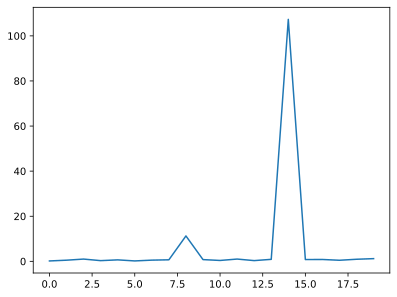

In [17]:
def bootstrap(key, rmse_array, B):
    N = rmse_array.shape[0]
    rmse_boot = jnp.zeros((B,))
    for b in range(B):
        key, subkey = jr.split(key)
        ind = jr.randint(subkey, (N,), 0, N)
        rmse_boot = rmse_boot.at[b].set(jnp.mean(rmse_array[ind]))
    return rmse_boot

agsf_boot = bootstrap(jr.PRNGKey(0), agsf_rmse, 100)
print(jnp.mean(agsf_boot))
print(jnp.std(agsf_boot))
plt.plot(agsf_rmse)
plt.show()


## Plots

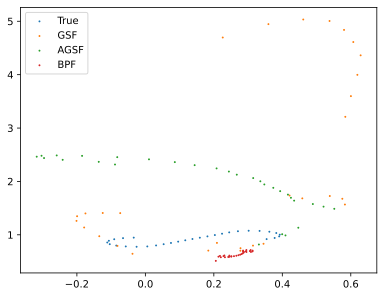

In [18]:
plt.scatter(states[:,0], states[:,2], label = 'True', s = 1)
plt.scatter(point_estimate_gsf[:,0], point_estimate_gsf[:,2], label = 'GSF', s = 1)
plt.scatter(point_estimate_agsf[:,0], point_estimate_agsf[:,2], label = 'AGSF', s = 1)
plt.scatter(point_estimate_bpf[:,0], point_estimate_bpf[:,2], label = 'BPF', s = 1)
plt.legend()   
plt.show()